<a href="https://colab.research.google.com/github/debkumarkuila7999/pfsinterns/blob/main/Heart_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction Model

# Importing Required Libraries

In [30]:
# Import libraries for data manipulation, visualization, and machine learning

# Data manipulation libraries
import pandas as pd  # For handling and manipulating dataframes
import numpy as np  # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For data visualization using Matplotlib
import seaborn as sns  # For advanced data visualization, built on top of Matplotlib

# Machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # For applying logistic regression model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance

# Libraries for data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical variables
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset

# Library for saving and loading models
import joblib  # For saving trained models to a file


#Uploading the Dataset

Upload Data File

In [31]:
# Code to upload the dataset using Google Colab

from google.colab import files  # Importing Colab's file handling library

# Trigger file upload dialog
uploaded = files.upload()  # This will allow you to browse and upload a file from your local system


Saving heart_disease_uci.csv to heart_disease_uci (1).csv


Load and Display the Dataset

In [61]:
# Load the CSV file into a DataFrame
df = pd.read_csv('heart_disease_uci.csv', encoding='latin-1')  # Loading the dataset and specifying the encoding

# Display the first 10 rows of the DataFrame to get an initial look at the data
df.head(10)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [62]:
# View the last 10 rows of the dataset
df.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,911,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,912,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,913,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


#Exploratory Data Analysis (EDA)

In [63]:
# Check the data types of each column and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [64]:
# Display basic statistical summary (mean, min, max, standard deviation, etc.) for numerical columns
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [65]:
# Check the number of rows and columns in the dataset
print(df.shape)

(920, 16)


In [66]:
# Display column names
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [67]:
# Get a count of unique values in each column (useful for categorical data)
print(df.nunique())

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64


#Visualize Data

Visualize Numerical Features

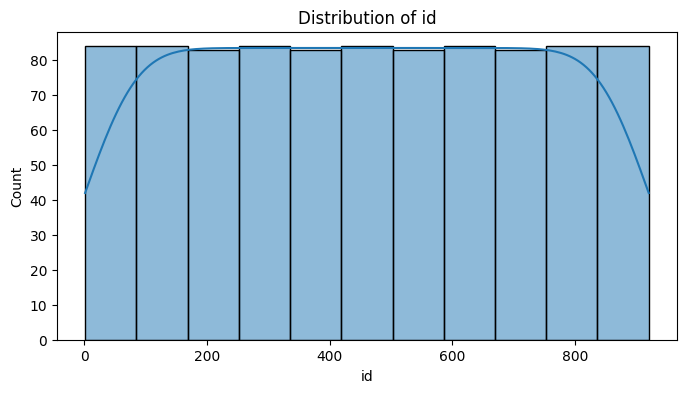

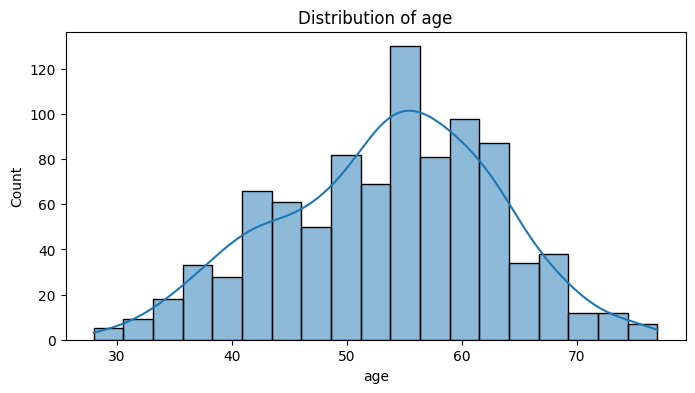

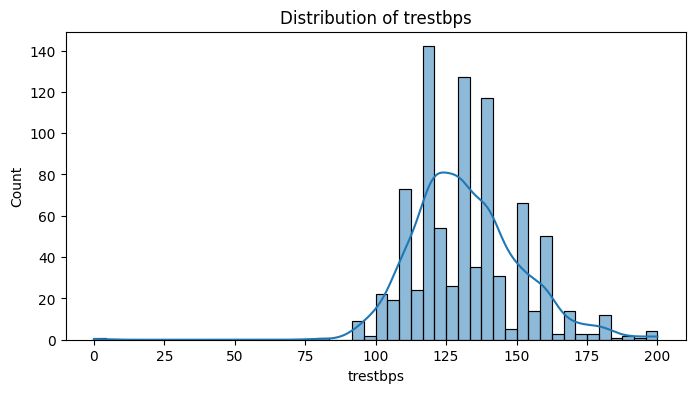

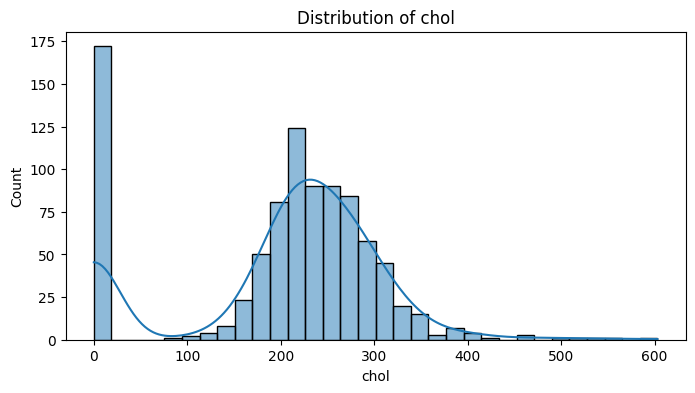

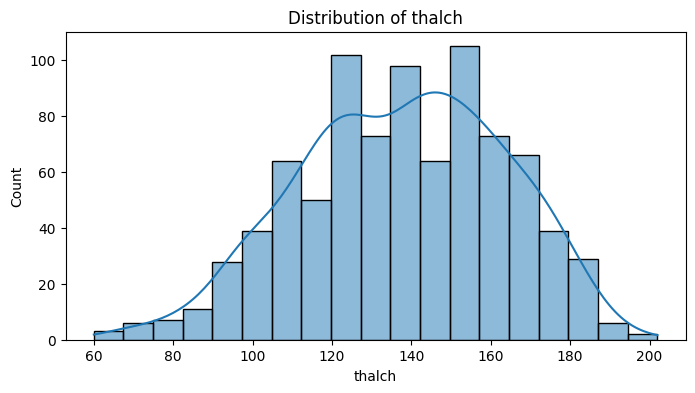

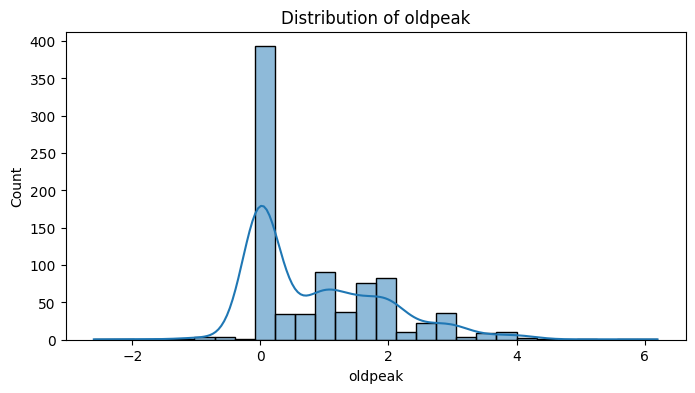

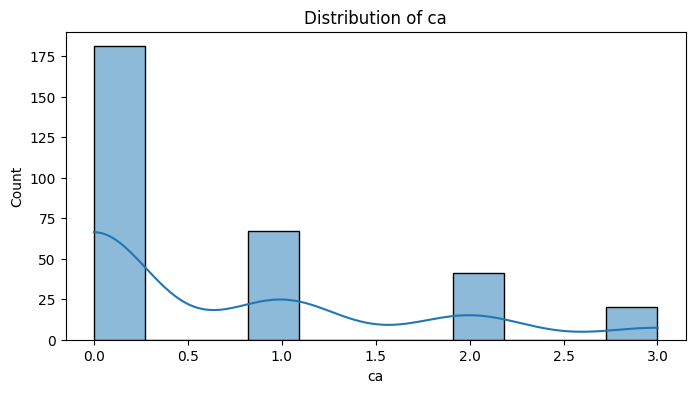

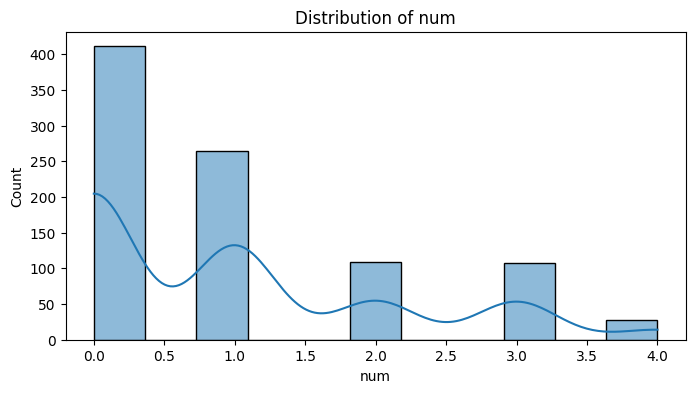

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features

# Select numerical features from the DataFrame (columns with data types float64 or int64)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical feature and create a histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Set the figure size for each plot
    sns.histplot(df[feature], kde=True)  # Plot the histogram with kernel density estimate (KDE) line
    plt.title(f'Distribution of {feature}')  # Add a title to the plot
    plt.show()  # Display the plot


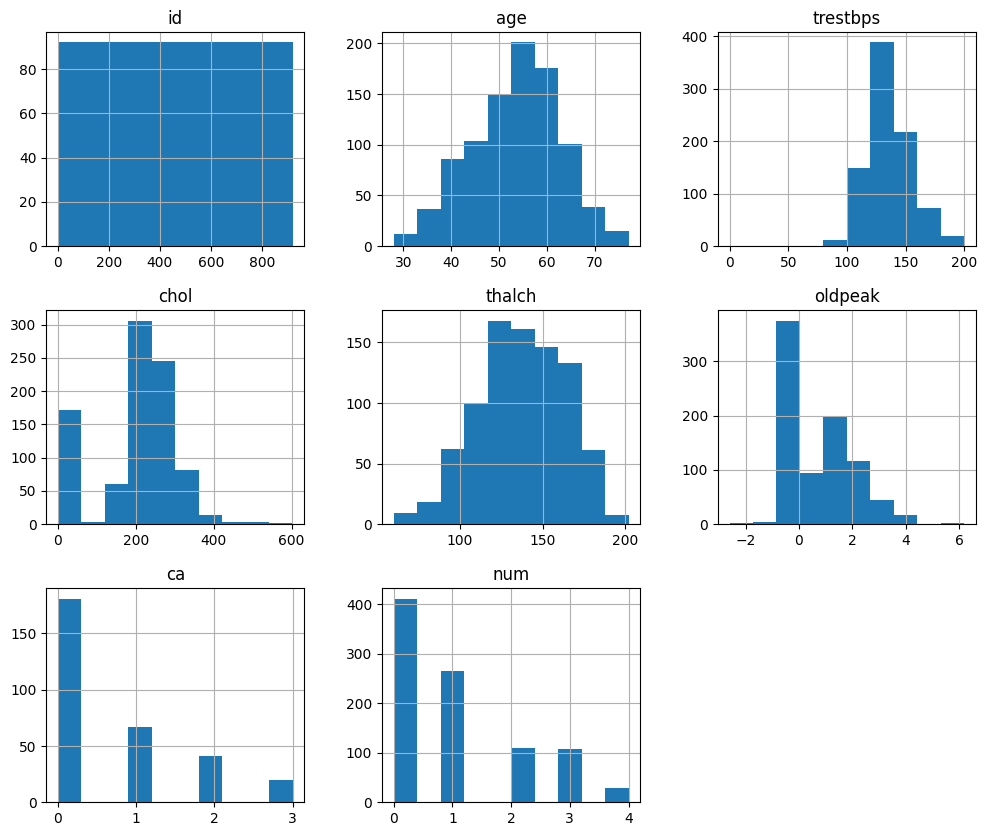

In [70]:
import matplotlib.pyplot as plt

# Generate histograms for all columns in the DataFrame
df.hist(figsize=(12, 10))  # Create a grid of histograms with a figure size of 12x10

# Display the plots
plt.show()  # Show all histograms at once


Visualize Categorical Features

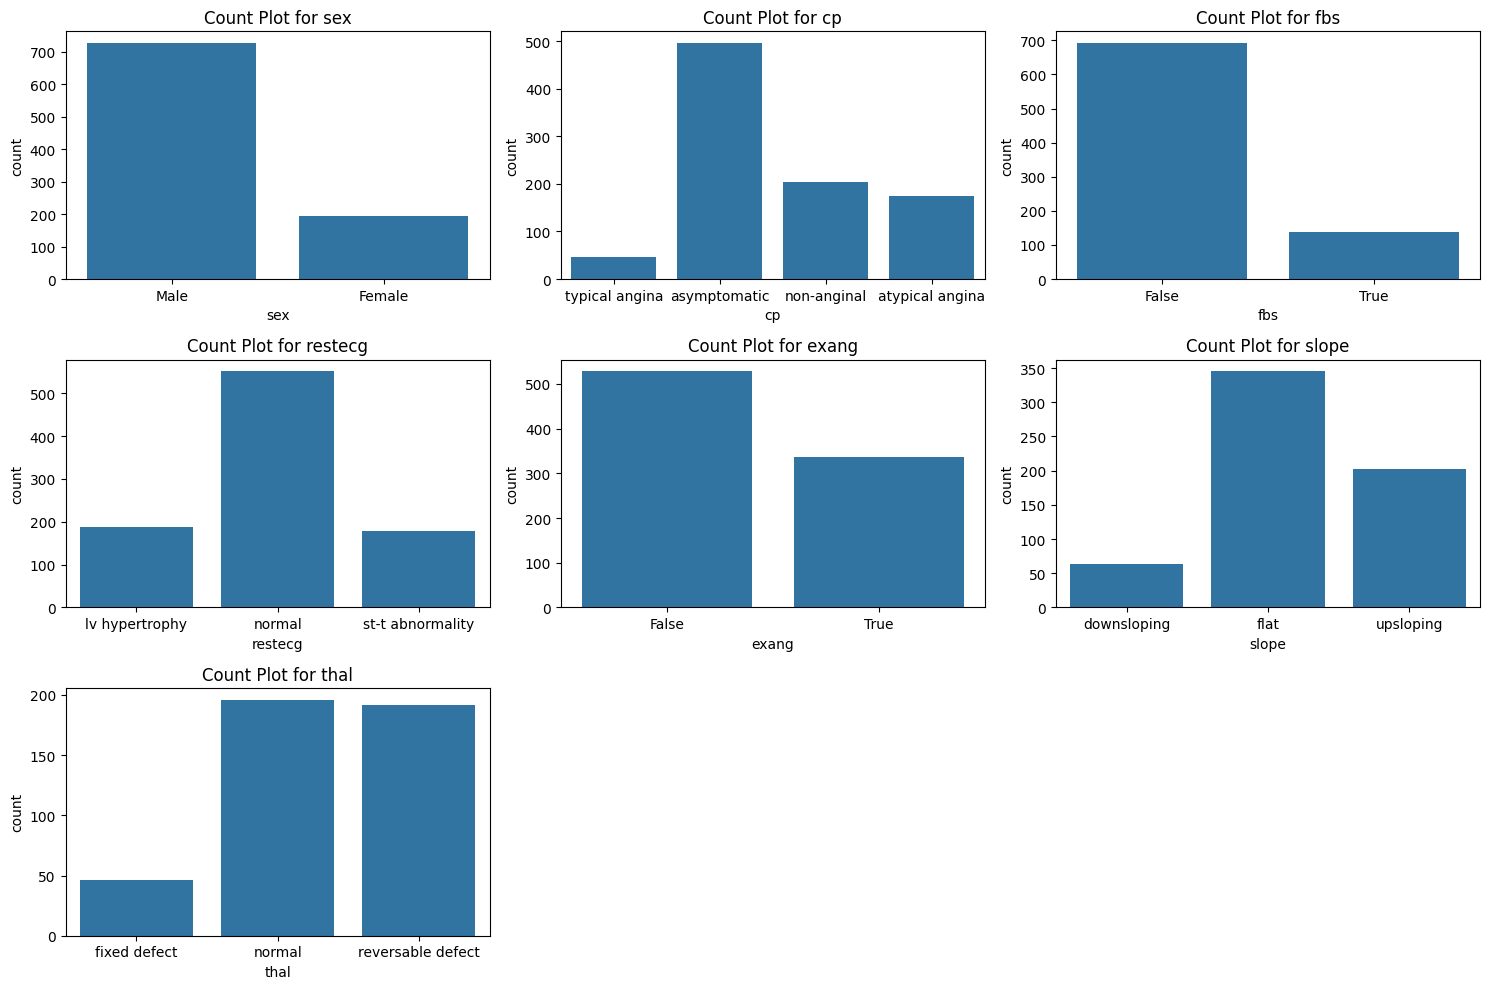

In [72]:
# Count plots for multiple categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.tight_layout()
plt.show()


Encode Categorical Variables and Generate Correlation Heatmap

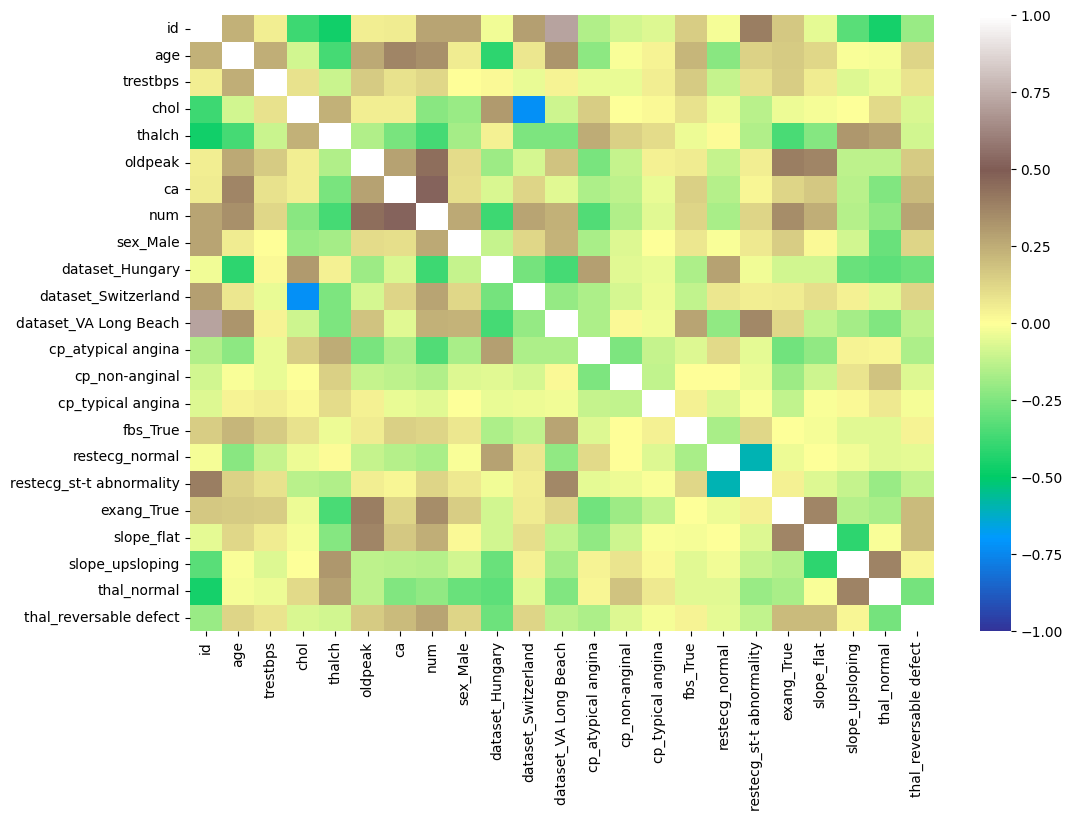

In [73]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables into dummy/indicator variables, drop the first level to avoid multicollinearity

# Compute the correlation matrix
corr = df_encoded.corr()  # Calculate the correlation between features in the encoded DataFrame

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(corr, annot=False, cmap='terrain', vmin=-1, vmax=1)  # Create a heatmap with the 'terrain' colormap, setting correlation bounds from -1 to 1
plt.show()  # Display the heatmap


#Data Preprocessing

Map Categorical Text Data to Numeric Values

In [45]:
# Map categorical text data to numeric values for model compatibility

# Convert 'sex' column to numeric values: Male = 1, Female = 0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Convert 'fbs' (fasting blood sugar) column to numeric values: TRUE = 1, FALSE = 0
df['fbs'] = df['fbs'].map({'TRUE': 1, 'FALSE': 0})

# Convert 'exang' (exercise-induced angina) column to numeric values: TRUE = 1, FALSE = 0
df['exang'] = df['exang'].map({'TRUE': 1, 'FALSE': 0})

# Convert 'cp' (chest pain type) column to numeric values:
# - typical angina = 0
# - atypical angina = 1
# - non-anginal = 2
# - asymptomatic = 3
df['cp'] = df['cp'].map({'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3})

# Convert 'restecg' (resting electrocardiographic results) column to numeric values:
# - normal = 0
# - lv hypertrophy = 1
# - ST-T wave abnormality = 2
df['restecg'] = df['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'ST-T wave abnormality': 2})

# Convert 'slope' (slope of the peak exercise ST segment) column to numeric values:
# - upsloping = 0
# - flat = 1
# - downsloping = 2
df['slope'] = df['slope'].map({'upsloping': 0, 'flat': 1, 'downsloping': 2})

# Convert 'thal' (thalassemia) column to numeric values:
# - normal = 0
# - fixed defect = 1
# - reversable defect = 2
df['thal'] = df['thal'].map({'normal': 0, 'fixed defect': 1, 'reversable defect': 2})


 Save Cleaned Data to a new csv File

In [46]:
import os  # Import the os module for interacting with the operating system

# Ensure the 'data' directory exists
if not os.path.exists('data'):
    os.makedirs('data')  # Create the 'data' directory if it does not already exist

# Save the cleaned data to a CSV file in the 'data' directory
df.to_csv('data/cleaned_heart_disease_data.csv', index=False)  # Save DataFrame to CSV without including the index column


#Feature Engineering

create a target column

In [47]:
# Convert the 'num' column to binary (0 for no disease, 1 for disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Create a new binary column 'target' where 1 indicates disease and 0 indicates no disease


Select Features and Target

In [48]:
# Select features and target for model training
X = df.drop(columns=['num', 'id', 'target', 'dataset'])  # Drop columns that are not needed for feature selection and modeling
y = df['target']  # Define 'y' as the target variable for prediction


Drop Columns with All NaN Values

In [49]:
# Drop columns with all NaN values from the features DataFrame
X = X.drop(columns=['fbs', 'exang'], errors='ignore')  # Remove 'fbs' and 'exang' columns if they exist and contain only NaN values

## Data Preprocessing Pipeline

In [50]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [51]:
# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



 Create a Pipeline for Preprocessing and Logistic Regression Model

In [52]:
# Create a pipeline with preprocessing and logistic regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(max_iter=1000, random_state=42))])


#Model Building and Training

Split the Data into Training and Testing Sets

In [53]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Model

In [54]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol',
                                                   'restecg', 'thalch',
                                                   'oldpeak', 'slope', 'ca',
                                                   'thal']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

#Model Evaluation

Evaluate the Model

In [55]:
# Evaluate the model
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


#Model Deployment

Save the Model

In [56]:
# Save the model
joblib.dump(model_pipeline, 'heart_disease_risk_model.pkl')

['heart_disease_risk_model.pkl']

Load the Entire Model Pipeline

In [57]:
# Load the entire pipeline
model_pipeline = joblib.load('heart_disease_risk_model.pkl')

Get the feature names expected by the pipeline

In [58]:
# Get the feature names expected by the pipeline
expected_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
print("Expected Columns:", expected_columns)

Expected Columns: ['age' 'sex' 'cp' 'trestbps' 'chol' 'restecg' 'thalch' 'oldpeak' 'slope'
 'ca' 'thal']


Test with New Input Data (Single Person)

In [59]:
# Test with new input data including all expected columns
input_data = pd.DataFrame({
    'age': [25],
    'sex': [0],
    'cp': [0],
    'trestbps': [110],
    'chol': [150],
    'thalch': [180],
    'restecg': [0],
    'oldpeak': [0.0],
    'slope': [0],
    'ca': [0],
    'thal': [0]
})

# Make prediction using the model pipeline
prediction = model_pipeline.predict(input_data)

# Print the prediction result
if prediction[0] == 0:
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')


The Person does not have Heart Disease


Test with Multiple Patients' Data at a same time

In [60]:

# Test with multiple patient data
input_data = pd.DataFrame({
    'age': [45, 63, 67, 67, 37, 41, 56, 62, 57, 63],
    'sex': [0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
    'cp': [1, 0, 3, 3, 2, 1, 1, 3, 1, 3],
    'trestbps': [130, 145, 160, 120, 130, 130, 120, 140, 180, 130],
    'chol': [250, 233, 286, 229, 250, 204, 236, 268, 354, 254],
    'thalch': [180, 150, 108, 129, 187, 172, 178, 160, 163, 147],
    'restecg': [1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    'oldpeak': [3.5, 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4],
    'slope': [2, 2, 1, 1, 2, 0, 0, 2, 0, 1],
    'ca': [2, 0, 3, 2, 0, 0, 0, 2, 0, 1],
    'thal': [0, 0, 2, 2, 0, 0, 0, 2, 0, 1]
})

# Make prediction using the model pipeline
predictions = model_pipeline.predict(input_data)

# Print the prediction results for each patient
for i, prediction in enumerate(predictions):
    result = 'The Person does not have Heart Disease' if prediction == 0 else 'The Person has Heart Disease'
    print(f'Patient {i+1}: {result}')


Patient 1: The Person has Heart Disease
Patient 2: The Person does not have Heart Disease
Patient 3: The Person has Heart Disease
Patient 4: The Person has Heart Disease
Patient 5: The Person has Heart Disease
Patient 6: The Person does not have Heart Disease
Patient 7: The Person does not have Heart Disease
Patient 8: The Person has Heart Disease
Patient 9: The Person does not have Heart Disease
Patient 10: The Person has Heart Disease
